In [102]:
### Consider the application of nearest-neighbors to the “easy” and
### “hard” problems in the left panel of Figure 13.5.
### 1. Replicate the results in the left panel of Figure 13.5.

In [103]:
# Setup 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from numpy.random import multivariate_normal as GaussianRV
from numpy.random import uniform
import math
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from numpy.random import choice

summary=pd.DataFrame({'model': pd.Series(dtype='object'),
                      'model_complexity': pd.Series(dtype='float'),
                      'neighbors_no': pd.Series(dtype='int'),
                      'run_no': pd.Series(dtype='int'),
                      'misclassification_error': pd.Series(dtype='float')
                     })

training_error=pd.DataFrame({'model': pd.Series(dtype='object'),
                             'model_complexity': pd.Series(dtype='float'),
                             'neighbors_no': pd.Series(dtype='int'),
                             'run_no': pd.Series(dtype='int'),
                             'misclassification_error': pd.Series(dtype='float')
                            })

training_data=pd.DataFrame({0: pd.Series(dtype='float'),
                            1: pd.Series(dtype='float'),
                            2: pd.Series(dtype='float'),
                            3: pd.Series(dtype='float'),
                            4: pd.Series(dtype='float'),
                            5: pd.Series(dtype='float'),
                            6: pd.Series(dtype='float'),
                            7: pd.Series(dtype='float'),
                            8: pd.Series(dtype='float'),
                            9: pd.Series(dtype='float'),
                            'y1': pd.Series(dtype='int'),
                            'y2': pd.Series(dtype='int'),
                            'index': pd.Series(dtype='int')
                     })

test_data=pd.DataFrame({0: pd.Series(dtype='float'),
                        1: pd.Series(dtype='float'),
                        2: pd.Series(dtype='float'),
                        3: pd.Series(dtype='float'),
                        4: pd.Series(dtype='float'),
                        5: pd.Series(dtype='float'),
                        6: pd.Series(dtype='float'),
                        7: pd.Series(dtype='float'),
                        8: pd.Series(dtype='float'),
                        9: pd.Series(dtype='float'),
                        'y1': pd.Series(dtype='int'),
                        'y2': pd.Series(dtype='int'),
                        'index': pd.Series(dtype='int')
                     })

M, P=100, 1000

# Consider 10 realization 
for no in np.arange(0,10):

    # Generate training dataset  
    X=uniform(low=0.,high=1.,size=(M,10))
    Y1=[1 if (X[j,1]>0.5) else 0 for j in np.arange(0,M) ]
    Y2=[1 if (((X[j,1]-0.5)*(X[j,2]-0.5)*(X[j,3]-0.5))/abs((X[j,1]-0.5)*(X[j,2]-0.5)*(X[j,3]-0.5))>0) else 0 for j in np.arange(0,M)]
    df=pd.DataFrame(data=X).assign(y1=Y1, y2=Y2, index=no)
    training_data=pd.concat([training_data,df],sort=False)
    
    # Generate test dataset  
    Xtest=uniform(low=0.,high=1.,size=(P,10))
    Y1test=[1 if (Xtest[j,1]>0.5) else 0 for j in np.arange(0,P) ]
    Y2test=[1 if (((Xtest[j,1]-0.5)*(Xtest[j,2]-0.5)*(Xtest[j,3]-0.5)
                  )/abs((Xtest[j,1]-0.5)*(Xtest[j,2]-0.5)*(Xtest[j,3]-0.5))>0) else 0 for j in np.arange(0,P)]
    df=pd.DataFrame(data=Xtest).assign(y1=Y1test, y2=Y2test, index=no)
    test_data=pd.concat([test_data,df],sort=False)

    # Scan over no. of neighbors  
    for k in np.arange(1,65,5):

        # Train the nearest-neighbor classifier for both models  
        modelE=KNeighborsClassifier(n_neighbors=k,algorithm='brute')
        modelE.fit(X,Y1)
        modelD=KNeighborsClassifier(n_neighbors=k,algorithm='brute')
        modelD.fit(X,Y2)
        
        # Add training error (useful for point 3)
        predsE=modelE.predict(X)
        predsD=modelD.predict(X)
        df=pd.concat([pd.DataFrame({'true_data': Y1, 'model_predictions': predsE}
                                  ).assign(model='easy', model_complexity=1./k, neighbors_no=k, run_no=no),
                      pd.DataFrame({'true_data': Y2, 'model_predictions': predsD}
                                  ).assign(model='difficult', model_complexity=1./k, neighbors_no=k, run_no=no)
                     ],sort=False)
        df['misclassification_error']=(df['true_data']==df['model_predictions']
                                      ).apply(lambda z: 0 if z==True else 1)
        df=df.groupby(by=['model','model_complexity','neighbors_no','run_no'])['misclassification_error'].sum().reset_index()
        training_error=pd.concat([training_error,df],sort=False)

        # calculate misclassification error 
        predsE=modelE.predict(Xtest)
        predsD=modelD.predict(Xtest)
        df=pd.concat([pd.DataFrame({'true_data': Y1test, 'model_predictions': predsE}
                                  ).assign(model='easy', model_complexity=1./k, neighbors_no=k, run_no=no),
                      pd.DataFrame({'true_data': Y2test, 'model_predictions': predsD}
                                  ).assign(model='difficult', model_complexity=1./k, neighbors_no=k, run_no=no)
                     ],sort=False)
        df['misclassification_error']=(df['true_data']==df['model_predictions']
                                      ).apply(lambda z: 0 if z==True else 1)
        df=df.groupby(by=['model','model_complexity','neighbors_no','run_no'])['misclassification_error'].mean().reset_index()
        summary=pd.concat([summary,df],sort=False)
summary=summary.groupby(by=['model','model_complexity','neighbors_no'])['misclassification_error'].agg(["mean","sem"]).reset_index()
print(summary)


        model  model_complexity  neighbors_no    mean       sem
0   difficult          0.016393            61  0.5125  0.007888
1   difficult          0.017857            56  0.5144  0.009376
2   difficult          0.019608            51  0.5136  0.009001
3   difficult          0.021739            46  0.5164  0.008590
4   difficult          0.024390            41  0.5139  0.008574
5   difficult          0.027778            36  0.5178  0.008159
6   difficult          0.032258            31  0.5158  0.009749
7   difficult          0.038462            26  0.5094  0.008488
8   difficult          0.047619            21  0.5004  0.006377
9   difficult          0.062500            16  0.4895  0.004094
10  difficult          0.090909            11  0.4758  0.004825
11  difficult          0.166667             6  0.4555  0.004329
12  difficult          1.000000             1  0.4283  0.004583
13       easy          0.016393            61  0.2068  0.020949
14       easy          0.017857         

Text(0, 0.5, 'Misclassification Error')

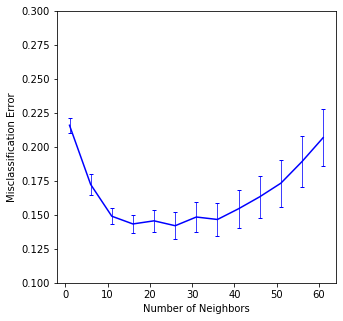

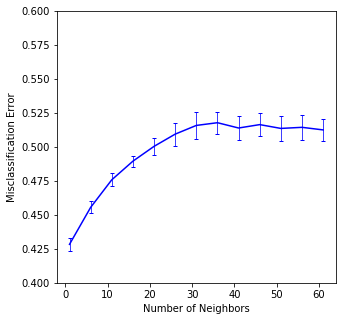

In [104]:
# generate plots (Fig. 13.5)
fig=plt.figure(figsize=(5., 5.))
plt.errorbar(summary.query("model == 'easy'")['neighbors_no'],
             summary.query("model == 'easy'")['mean'],
             yerr=summary.query("model == 'easy'")['sem'],
             c='blue',elinewidth=0.75,capsize=2.)
plt.ylim(0.1,0.3)
plt.xlabel('Number of Neighbors') ; plt.ylabel('Misclassification Error')

fig=plt.figure(figsize=(5., 5.))
plt.errorbar(summary.query("model == 'difficult'")['neighbors_no'],
         summary.query("model == 'difficult'")['mean'],
         yerr=summary.query("model == 'difficult'")['sem'],
         c='blue',elinewidth=0.75,capsize=2.)
plt.ylim(0.4,0.6)
plt.xlabel('Number of Neighbors') ; plt.ylabel('Misclassification Error')

In [105]:
### 2. Estimate the misclassification errors using fivefold cross-validation,
## and compare the error rate curves to those in 1.

summary2=pd.DataFrame(columns=['model_complexity','neighbors_no','test_error','fold_no','split_no','run_no'])

# Run over 10 realization 
for no in np.arange(0,10):

    # Select training dataset  
    X=training_data.copy().query("index == @no")[[0,1,2,3,4,5,6,7,8,9]].to_numpy()
    Y1=training_data.copy().query("index == @no")['y1'].to_numpy()
    Y2=training_data.copy().query("index == @no")['y2'].to_numpy()
    
    # implement 5-fold cross validation 
    # split training dataset 
    K=5
    p=int(M/K)
    for s in np.arange(0,25):
        indexlist=choice(np.arange(0,len(X)),size=(K,p),replace=False)
        # run over no. neighbors
        for k in np.arange(1,65,5):
            # estimate cross-validation error 
            for q in np.arange(0,K):
                # filter out cross-validation data
                indx=np.setdiff1d(indexlist.flatten(),indexlist[q])
                CVXtraining, CVY1training, CVY2training=X[indx], Y1[indx] , Y2[indx] 
                CVXtest, CVY1test, CVY2test=X[indexlist[q]], Y1[indexlist[q]], Y2[indexlist[q]] 
                # train the model 
                modelE=KNeighborsClassifier(n_neighbors=k,algorithm='brute')
                modelE.fit(CVXtraining,CVY1training)
                modelD=KNeighborsClassifier(n_neighbors=k,algorithm='brute')
                modelD.fit(CVXtraining,CVY2training)
                # calculate cross validation error 
                CV1preds=modelE.predict(CVXtest)
                CV2preds=modelD.predict(CVXtest)
                df=pd.concat([pd.DataFrame({'true_data': CVY1test, 'model_predictions': CV1preds}
                                          ).assign(model='easy', model_complexity=1./k, neighbors_no=k, run_no=no, fold_no=q, split_no=s),
                              pd.DataFrame({'true_data': CVY2test, 'model_predictions': CV2preds}
                                          ).assign(model='difficult', model_complexity=1./k, neighbors_no=k, run_no=no, fold_no=q, split_no=s)
                             ],sort=False)
                df['misclassification_error']=(df['true_data']==df['model_predictions']
                                              ).apply(lambda z: 0 if z==True else 1)
                df=df.groupby(by=['model','model_complexity','neighbors_no','run_no','fold_no','split_no'])['misclassification_error'].mean().reset_index()
                summary2=pd.concat([summary2,df],sort=False)
summary2=summary2.groupby(by=['model','model_complexity','neighbors_no'])['misclassification_error'].agg(["mean","sem"]).reset_index()
print(summary2)



        model  model_complexity  neighbors_no     mean       sem
0   difficult          0.016393            61  0.46176  0.003317
1   difficult          0.017857            56  0.46124  0.003112
2   difficult          0.019608            51  0.46464  0.003161
3   difficult          0.021739            46  0.46288  0.003022
4   difficult          0.024390            41  0.46644  0.003064
5   difficult          0.027778            36  0.47756  0.002897
6   difficult          0.032258            31  0.48524  0.002876
7   difficult          0.038462            26  0.48624  0.002949
8   difficult          0.047619            21  0.48372  0.002968
9   difficult          0.062500            16  0.47224  0.002933
10  difficult          0.090909            11  0.46824  0.002951
11  difficult          0.166667             6  0.47904  0.002981
12  difficult          1.000000             1  0.42756  0.003211
13       easy          0.016393            61  0.27416  0.004688
14       easy          0.

Text(0, 0.5, 'Misclassification Error')

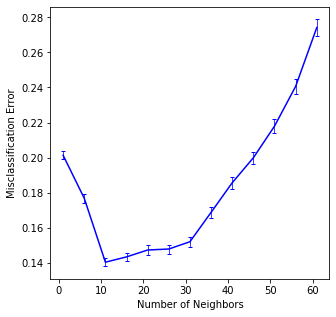

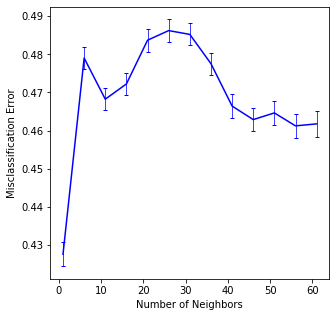

In [106]:
# generate plots (Fig. 13.5)
fig=plt.figure(figsize=(5., 5.))
plt.errorbar(summary2.query("model == 'easy'")['neighbors_no'],
             summary2.query("model == 'easy'")['mean'],
             yerr=summary2.query("model == 'easy'")['sem'],
             c='blue',elinewidth=0.75,capsize=2.)
# plt.ylim(0.1,0.3)
plt.xlabel('Number of Neighbors') ; plt.ylabel('Misclassification Error')

fig=plt.figure(figsize=(5., 5.))
plt.errorbar(summary2.query("model == 'difficult'")['neighbors_no'],
         summary2.query("model == 'difficult'")['mean'],
         yerr=summary2.query("model == 'difficult'")['sem'],
         c='blue',elinewidth=0.75,capsize=2.)
# plt.ylim(0.4,0.6)
plt.xlabel('Number of Neighbors') ; plt.ylabel('Misclassification Error')

In [107]:
### 3. Consider an “AIC-like” penalization of the training set misclassification error. 
### Specifically, add 2t/N to the training set misclassification error, 
### where t is the approximate number of parameters N/r, r being the number of nearest-neighbors. 
### Compare plots of the resulting penalized misclassification error to those in 1 and 2. 

summary3=training_error.copy()
summary3['misclassification_error']/=M
summary3['AIC-like_penalty']=summary3['neighbors_no'].apply(lambda z: 2./z)
summary3['misclassification_error']=summary3['misclassification_error']+summary3['AIC-like_penalty']
summary3=summary3.groupby(by=['model','model_complexity','neighbors_no'])['misclassification_error'].agg(["mean","sem"]).reset_index()
print(summary3)

        model  model_complexity  neighbors_no      mean       sem
0   difficult          0.016393            61  0.470787  0.019020
1   difficult          0.017857            56  0.472714  0.017000
2   difficult          0.019608            51  0.467216  0.013149
3   difficult          0.021739            46  0.476478  0.014686
4   difficult          0.024390            41  0.497780  0.016361
5   difficult          0.027778            36  0.497556  0.013149
6   difficult          0.032258            31  0.502516  0.014667
7   difficult          0.038462            26  0.495923  0.013699
8   difficult          0.047619            21  0.491238  0.009684
9   difficult          0.062500            16  0.500000  0.012134
10  difficult          0.090909            11  0.513818  0.008138
11  difficult          0.166667             6  0.667333  0.013433
12  difficult          1.000000             1  2.000000  0.000000
13       easy          0.016393            61  0.196787  0.021040
14       e

Text(0, 0.5, 'Misclassification Error')

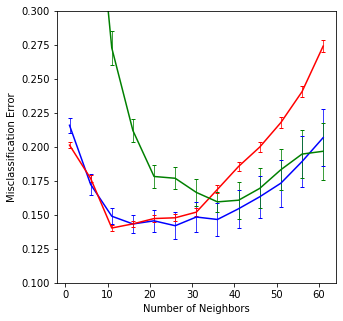

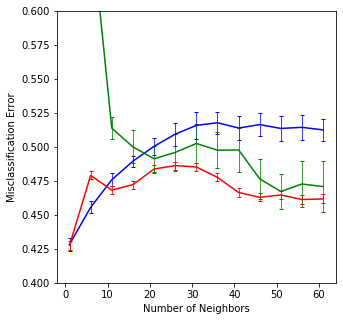

In [110]:
# comparison plots 
fig=plt.figure(figsize=(5., 5.))
plt.errorbar(summary.query("model == 'easy'")['neighbors_no'],
             summary.query("model == 'easy'")['mean'],
             yerr=summary.query("model == 'easy'")['sem'],
             c='blue',elinewidth=0.75,capsize=2.)
plt.errorbar(summary2.query("model == 'easy'")['neighbors_no'],
             summary2.query("model == 'easy'")['mean'],
             yerr=summary2.query("model == 'easy'")['sem'],
             c='red',elinewidth=0.75,capsize=2.)
plt.errorbar(summary3.query("model == 'easy'")['neighbors_no'],
             summary3.query("model == 'easy'")['mean'],
             yerr=summary3.query("model == 'easy'")['sem'],
             c='green',elinewidth=0.75,capsize=2.)
plt.ylim(0.1,0.3)
plt.xlabel('Number of Neighbors') ; plt.ylabel('Misclassification Error')

fig=plt.figure(figsize=(5., 5.))
plt.errorbar(summary.query("model == 'difficult'")['neighbors_no'],
         summary.query("model == 'difficult'")['mean'],
         yerr=summary.query("model == 'difficult'")['sem'],
         c='blue',elinewidth=0.75,capsize=2.)
plt.errorbar(summary2.query("model == 'difficult'")['neighbors_no'],
         summary2.query("model == 'difficult'")['mean'],
         yerr=summary2.query("model == 'difficult'")['sem'],
         c='red',elinewidth=0.75,capsize=2.)
plt.errorbar(summary3.query("model == 'difficult'")['neighbors_no'],
             summary3.query("model == 'difficult'")['mean'],
             yerr=summary3.query("model == 'difficult'")['sem'],
             c='green',elinewidth=0.75,capsize=2.)
plt.ylim(0.4,0.6)
plt.xlabel('Number of Neighbors') ; plt.ylabel('Misclassification Error')

In [ ]:
### Which method gives a better estimate of the optimal number of nearest-neighbors: cross-validation or AIC?
### CV is clearly better. It identifies correctly the optimal number of nearest-neighbors in both models. 
### The AIC-like penalty works quite badly. Particularly for the "difficult" model, it is 
### not able to identify 1 as the optimal no. of neighbours. 
### Also for the "easy" model the optimal no. of neighbours is overestimated.  